In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
sns.set_context('poster')
import glob
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
from scipy.stats import pearsonr, spearmanr
from scipy.stats import wasserstein_distance
import os

%load_ext autoreload
%autoreload 2

In [2]:
path_prefix = '../'
import sys
sys.path.append(path_prefix)
from util import resolution_util as ru
from util import plot_util as pu
from util import ml_util as mu
import atlas_mpl_style as ampl
ampl.set_color_cycle('Oceanic',10)
# plt.style.use('paper')

2021-10-26 07:27:40.111736: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2


In [3]:
data_dir_nearest_1 = '../results/Nearest_20211019_0757_nearest_weightedRegress_optimized/'
data_dir_nearest_2 = '../results/Nearest_20211019_0757_nearest_concatClass_optimized/'

Loading form ../results/Nearest_20211019_0757_nearest_weightedRegress_optimized/ for $pi\pm$
Loading form ../results/Nearest_20211019_0757_nearest_concatClass_optimized/ for $pi\pm$


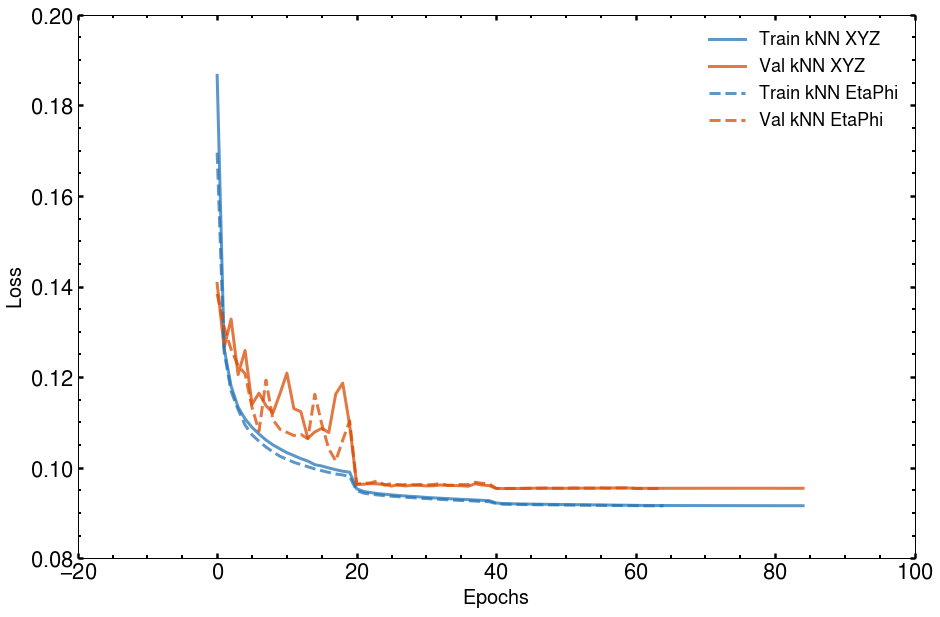

In [4]:
pion_list = ['pion']
sym_list = ['+-',]
concat_type = ['False']
model_name = ['ConcatFalse']
line = ['-', '--', ':', '-.']
blues = matplotlib.cm.Blues_r(np.linspace(0,1,20))
oranges = matplotlib.cm.Oranges_r(np.linspace(0,1,20))

plt.figure(figsize=(15,10))
hist_files = np.sort(glob.glob(data_dir_nearest_1 + 'losses.npz'))
print('Loading form {} for {}'.format(data_dir_nearest_1, r'$pi\pm$'))
hist = np.load(hist_files[0])
plt.plot(hist['training'].mean(axis=1), color=blues[5, :3], 
             label=r'Train kNN XYZ', linestyle=line[0], alpha=.75)
plt.plot(hist['validation'].mean(axis=1), color=oranges[5, :3], 
             label=r'Val kNN XYZ', linestyle=line[0], alpha=.75)

# print('\nPlotting losses fro {}'.format(data_dir))
hist_files = np.sort(glob.glob(data_dir_nearest_2 + 'losses.npz'))
print('Loading form {} for {}'.format(data_dir_nearest_2, r'$pi\pm$'))
hist = np.load(hist_files[0])
plt.plot(hist['training'].mean(axis=1), color=blues[5, :3], 
             label=r'Train kNN EtaPhi', linestyle=line[1], alpha=.75)
plt.plot(hist['validation'].mean(axis=1), color=oranges[5, :3], 
             label=r'Val kNN EtaPhi', linestyle=line[1], alpha=.75)


plt.ylabel(r'$Loss$')
plt.xlabel(r'$Epochs$')
# plt.ylim([.085, .11])
# sns.despine()
plt.legend()
    # plt.savefig('results/training_mse.png', bbox_inches='tight', dpi=300)
plt.show()


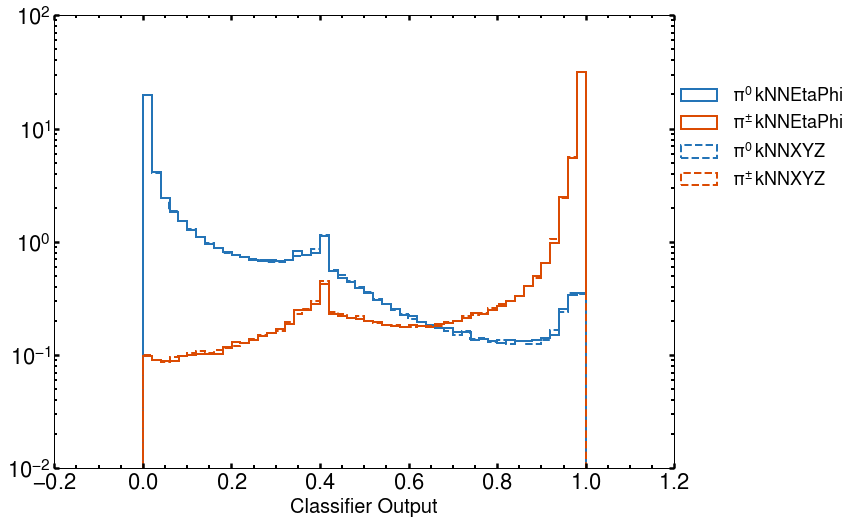

In [5]:
# predictions_simul = np.load(data_dir_simul+'/predictions.npz')
# targets_class_simul = predictions_simul['targets'][:, 1]
# outputs_class_simul = predictions_simul['outputs'][:, 1]

# predictions_weighted = np.load(data_dir_weighted+'/predictions.npz')
# targets_class_weighted = predictions_weighted['targets'][:, 1]
# outputs_class_weighted = predictions_weighted['outputs'][:, 1]

predictions_nearestEtaPhi = np.load(data_dir_nearest_2+'/predictions.npz')
targets_class_nearestEtaPhi = predictions_nearestEtaPhi['targets'][:, 1]
outputs_class_nearestEtaPhi = predictions_nearestEtaPhi['outputs'][:, 1]

predictions_nearestXYZ = np.load(data_dir_nearest_1+'/predictions.npz')
targets_class_nearestXYZ = predictions_nearestXYZ['targets'][:, 1]
outputs_class_nearestXYZ = predictions_nearestXYZ['outputs'][:, 1]

# plt.hist(outputs_class_simul[targets_class_simul==0], 50, density=True, histtype='step', 
#          color=blues[5, :3], linewidth=2, linestyle=line[0], label='$\\pi^{0}\,combined$')
# plt.hist(outputs_class_simul[targets_class_simul==1], 50, density=True, histtype='step', 
#          color=oranges[5, :3], linewidth=2, linestyle=line[0], label='$\\pi^{\\pm}\,combined$')

# plt.hist(outputs_class_weighted[targets_class_weighted==0], 50, density=True, histtype='step', 
#          color=blues[5, :3], linewidth=2, linestyle=line[0], label='$\\pi^{0}\,weighted$')
# plt.hist(outputs_class_weighted[targets_class_weighted==1], 50, density=True, histtype='step', 
#          color=oranges[5, :3], linewidth=2, linestyle=line[0], label='$\\pi^{\\pm}\,weighted$')

plt.hist(outputs_class_nearestEtaPhi[targets_class_nearestEtaPhi==0], 50, density=True, histtype='step', 
         color=blues[5, :3], linewidth=2, linestyle=line[0], label='$\\pi^{0}\,kNN EtaPhi$')
plt.hist(outputs_class_nearestEtaPhi[targets_class_nearestEtaPhi==1], 50, density=True, histtype='step', 
         color=oranges[5, :3], linewidth=2, linestyle=line[0], label='$\\pi^{\\pm}\,kNN EtaPhi$')

plt.hist(outputs_class_nearestXYZ[targets_class_nearestXYZ==0], 50, density=True, histtype='step', 
         color=blues[5, :3], linewidth=2, linestyle=line[1], label='$\\pi^{0}\,kNN XYZ$')
plt.hist(outputs_class_nearestXYZ[targets_class_nearestXYZ==1], 50, density=True, histtype='step', 
         color=oranges[5, :3], linewidth=2, linestyle=line[1], label='$\\pi^{\\pm}\,kNN XYZ$')

plt.legend(loc=[1, .6])
plt.xlabel('Classifier Output')
plt.yscale('log')
plt.show()

In [10]:
# resp_median_simul = np.load(data_dir_simul+'/response_medians.npz')['response_median']
# resp_median_weighted = np.load(data_dir_weighted+'/response_medians.npz')['response_median']
resp_median_nearestEtaPhi = np.load(data_dir_nearest_2+'/response_medians.npz')['response_median']
resp_median_nearestXYZ = np.load(data_dir_nearest_1+'/response_medians.npz')['response_median']

response_median_pions = np.vstack([resp_median_nearestEtaPhi[2],
                                   resp_median_nearestXYZ[2]])

response_median_pi0 = np.vstack([resp_median_nearestEtaPhi[1],
                                 resp_median_nearestXYZ[1]])
xcenter = np.load(data_dir_nearest_2+'/response_medians.npz')['xcenter']

extra_line [[0, 10000.0], [1, 1]]


<Figure size 799.992x599.976 with 0 Axes>

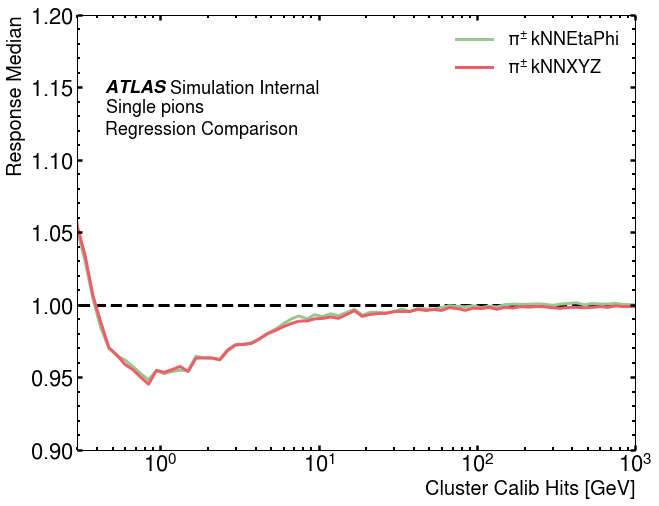

In [11]:
pu.lineOverlay(xcenter=xcenter, lines=response_median_pions,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{\pm}\:kNN EtaPhi$',
                          r'$\pi^{\pm}\:kNN XYZ$', 
                          ],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response Median',
                figfile = '', # medResponse_gnBlock.png',
                y_max=1.2, y_min=.9, x_min = .3,
                extra_lines= [[[0, 10e3], [1, 1]]],
                linestyles = ['solid', 'solid', 'solid', 'solid',],
                atlas_x = 0.05, atlas_y = 0.85, simulation = True,
                textlist = [{'x': 0.05, 'y': 0.775, 'text': 'Single $pions$'},
                            {'x': 0.05, 'y': 0.725,  'text': 'Regression Comparison'}])

extra_line [[0, 10000.0], [1, 1]]


<Figure size 799.992x599.976 with 0 Axes>

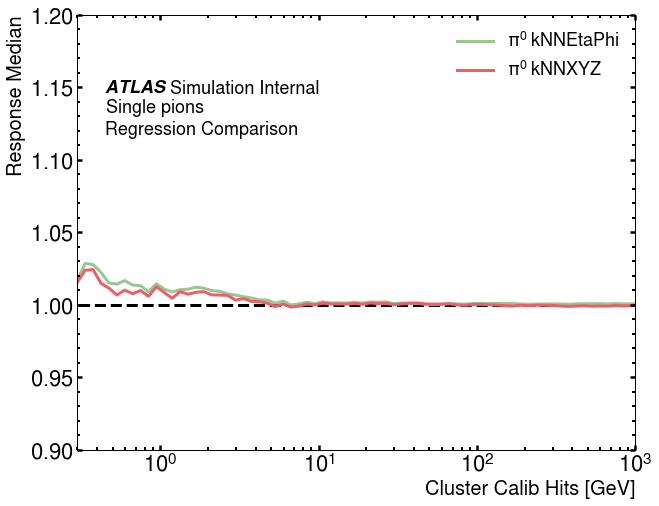

In [12]:
pu.lineOverlay(xcenter=xcenter, lines=response_median_pi0,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{0}\:kNN EtaPhi$',
                          r'$\pi^{0}\:kNN XYZ$', 
                          ],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response Median',
                figfile = '', # medResponse_gnBlock.png',
                y_max=1.2, y_min=.9, x_min = .3,
                extra_lines= [[[0, 10e3], [1, 1]]],
                linestyles = ['solid', 'solid', 'solid', 'solid',],
                atlas_x = 0.05, atlas_y = 0.85, simulation = True,
                textlist = [{'x': 0.05, 'y': 0.775, 'text': 'Single $pions$'},
                            {'x': 0.05, 'y': 0.725,  'text': 'Regression Comparison'}])

In [19]:
iqr_simul = np.load(data_dir_simul+'/iqr.npz')['response_median']
iqr_weighted = np.load(data_dir_weighted+'/iqr.npz')['response_median']
iqr_nearest = np.load(data_dir_nearest+'/iqr.npz')['response_median']

iqr_pions = np.vstack([iqr_simul[2], 
                       iqr_weighted[2], 
                       iqr_nearest[2]])

iqr_pi0 = np.vstack([iqr_simul[1], 
                     iqr_weighted[1], 
                     iqr_nearest[1]])
xcenter = np.load(data_dir_weighted+'/iqr.npz')['xcenter']

<Figure size 799.992x599.976 with 0 Axes>

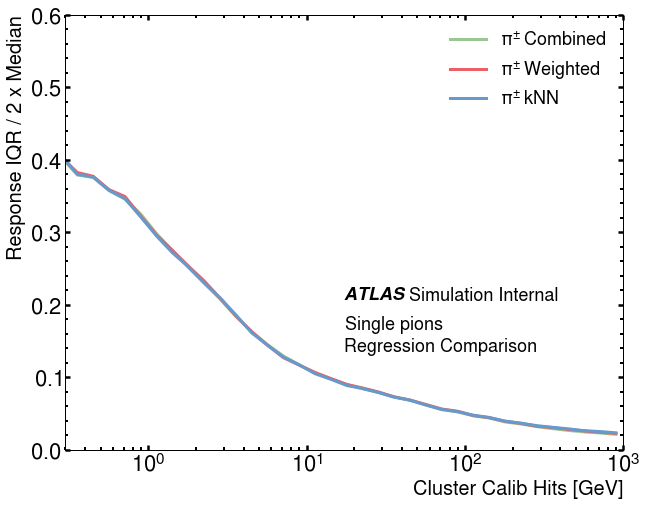

In [20]:
pu.lineOverlay(xcenter=xcenter, lines = iqr_pions,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{\pm}\:Combined$', 
                          r'$\pi^{\pm}\:Weighted$', 
                          r'$\pi^{\pm}\:kNN$'],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response IQR / 2 x Median',
                figfile = '', # 'iqr_gnBlock.png',
                y_max = .6, x_min = .3,
                linestyles = ['solid', 'solid', 'solid', 'solid',],
                atlas_x = 0.5, atlas_y = 0.375, simulation = True,
                textlist = [{'x': 0.5, 'y': 0.275, 'text': 'Single $pions$'},
                            {'x': 0.5, 'y': 0.225,  'text': 'Regression Comparison'}])

<Figure size 799.992x599.976 with 0 Axes>

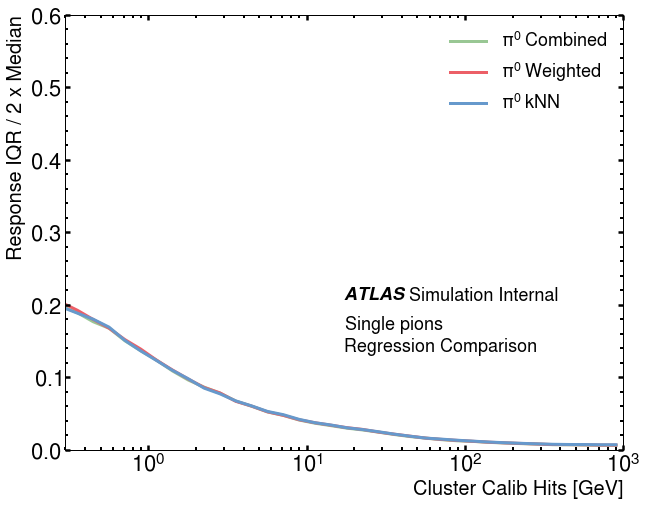

In [21]:
pu.lineOverlay(xcenter=xcenter, lines = iqr_pi0,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{0}\:Combined$', 
                          r'$\pi^{0}\:Weighted$', 
                          r'$\pi^{0}\:kNN$'],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response IQR / 2 x Median',
                figfile = '', # 'iqr_gnBlock.png',
                y_max = .6, x_min = .3,
                linestyles = ['solid', 'solid', 'solid', 'solid',],
                atlas_x = 0.5, atlas_y = 0.375, simulation = True,
                textlist = [{'x': 0.5, 'y': 0.275, 'text': 'Single $pions$'},
                            {'x': 0.5, 'y': 0.225,  'text': 'Regression Comparison'}])